## EE 461P: Data Science Principles  
### Term Project
### Blog Due: May 13, 2021 
### Presentation May 4, 2021





In [7]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SequentialFeatureSelector
import os, sys, re
import time
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.metrics import plot_roc_curve 
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import r2_score
from sklearn.naive_bayes import BernoulliNB

#Load dataset from csv file
df = pd.read_csv("PS_20174392719_1491204439457_log.csv")
print("data loaded")

data loaded


In [8]:
#Data preprocessing 
df = pd.get_dummies(df, prefix_sep="_", columns=['type'])
for col in ["nameOrig","nameDest"]:
    df[col] = df[col].astype('category')
    df[col] = df[col].cat.codes
df["unequalChangeAccounts"] = np.where((df["oldbalanceOrg"]-df["newbalanceOrig"])!=(df["newbalanceDest"]-df["oldbalanceDest"]),1,0)
df["flowDirection"] = np.where((df["oldbalanceOrg"]-df["newbalanceOrig"])<(df["oldbalanceDest"]-df["newbalanceDest"]),1,0)
df["unequalChangeAmount1"] = np.where((df["amount"])!=abs(df["newbalanceOrig"]-df["oldbalanceOrg"]),1,0)
df["unequalChangeAmount2"] = np.where((df["amount"])!=abs(df["newbalanceDest"]-df["oldbalanceDest"]),1,0)
df = df.drop(["oldbalanceOrg","newbalanceOrig","newbalanceDest","oldbalanceDest","amount","isFlaggedFraud","step"],axis=1)
fraud_rows = df[df['isFraud']==1].copy()
not_fraud_rows = df[df['isFraud']==0].copy()
X=df
y = df.pop("isFraud")
X_tr, X_te, y_tr, y_te = train_test_split(X,y, test_size=0.25, random_state = 42)
f_y = fraud_rows.pop("isFraud")
f_x = fraud_rows
nf_y = not_fraud_rows.pop("isFraud")
nf_x = not_fraud_rows
print("data processed")

data processed


In [9]:
bnb = BernoulliNB(fit_prior=False)
bnb.fit(X_tr,y_tr)
print("Model Accuracy on All Test Data: {}".format(bnb.score(X_te,y_te)))
print("Model Accuracy for predicting true fraud: {}".format(bnb.score(f_x,f_y)))
print("Model Accuracy for predicting true not fraud: {}".format(bnb.score(nf_x,nf_y)))
print(sum(bnb.predict(X)))
print(sum(y))
print(roc_auc_score(y_te,bnb.predict_proba(X_te)[:,1]))

Model Accuracy on All Test Data: 0.9774998349736429
Model Accuracy for predicting true fraud: 0.9902593449409473
Model Accuracy for predicting true not fraud: 0.9773210938487258
152244
8213
0.9928036685790221


[-1.62087690e-04 -1.62087690e-04 -8.72745412e+00 -6.90234086e-01
 -8.72745412e+00 -8.72745412e+00 -6.96068786e-01 -3.05671110e-01
 -6.32955884e+00 -4.77621040e+00 -3.05451112e-01]


C:\Users\jwall\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:101: FutureWarning: Attribute coef_ was deprecated in version 0.24 and will be removed in 1.1 (renaming of 0.26).
  warnings.warn(msg, category=FutureWarning)


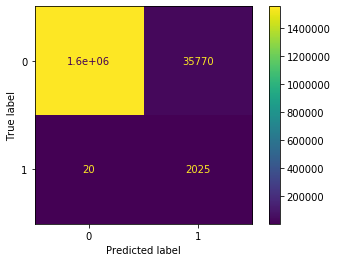

In [13]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(bnb, X_te, y_te)
for feature,coef in zip(bnb.classes_,bnb.coef_):
    print(coef)